## Observations and Insights 

Versus a placebo, the drug regimens Capomulin and Ramicane significantly reduced tumor size.

Generally, the drug Capomulin was effective in reducing the tumor size in mice over the timepoints given.

Mice with a higher weight were generally more susceptible to larger tumor sizes, and Capomulin was less effective in lowering the size of these tumors.

Several drugs seemed to have little effect on the size of the tumor versus the placebo treatment, when viewing average tumor size. 

In [399]:
%matplotlib notebook

In [439]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
datacombined = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
datacombined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

datacombined['Mouse ID'].nunique()

249

In [80]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupemice = datacombined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
dupemicedf = datacombined[dupemice]
dupemicedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [81]:
# Optional: Get all the data for the duplicate mouse ID. 


In [97]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandatacombined = datacombined.drop([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920])
pd.set_option('display.max_rows', None)
cleandatacombined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [98]:
# Checking the number of mice in the clean DataFrame.
cleandatacombined['Mouse ID'].nunique()

248

## Summary Statistics

In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumormean = cleandatacombined.groupby("Drug Regimen").mean()
tumormedian = cleandatacombined.groupby("Drug Regimen").median()
tumorvar = cleandatacombined.groupby("Drug Regimen").var()
tumorstd = cleandatacombined.groupby("Drug Regimen").std()
tumorsem = cleandatacombined.groupby("Drug Regimen").sem()

tumorstats_df = pd.DataFrame({"Average Tumor Volume": tumormean['Tumor Volume (mm3)'],
                             "Median Tumor Volume": tumormedian['Tumor Volume (mm3)'],
                             "Tumor Volume Variance": tumorvar['Tumor Volume (mm3)'],
                             "Tumor Std Deviation": tumorstd['Tumor Volume (mm3)'],
                             "Tumor SE of Mean": tumorsem['Tumor Volume (mm3)']})
tumorstats_df

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Std Deviation,Tumor SE of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorstats_df
# Using the aggregation method, produce the same summary statistics in a single line
tumorstatsagg = cleandatacombined.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])
tumorstatsagg["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


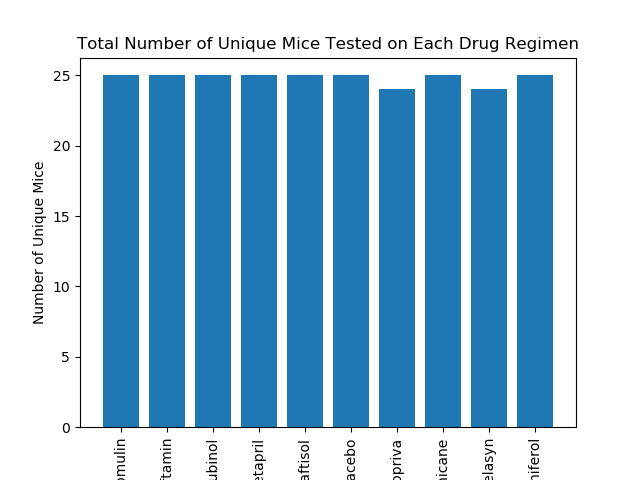

Text(0, 0.5, 'Number of Unique Mice')

In [223]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugmice = cleandatacombined.groupby(["Drug Regimen"])
countmice = drugmice['Mouse ID'].unique()

micereg = []

for i in countmice:
    micereg.append(len(i))
    
regimen_df = pd.DataFrame({"Drug Regimen": countmice.index,
                          "Number of Mice": micereg})

plt.bar(regimen_df["Drug Regimen"], regimen_df["Number of Mice"], align='center')
tick_locations = [value for value in regimen_df["Drug Regimen"]]
plt.xticks(tick_locations,regimen_df["Drug Regimen"], rotation='vertical')
plt.title("Total Number of Unique Mice Tested on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice")

<IPython.core.display.Javascript object>


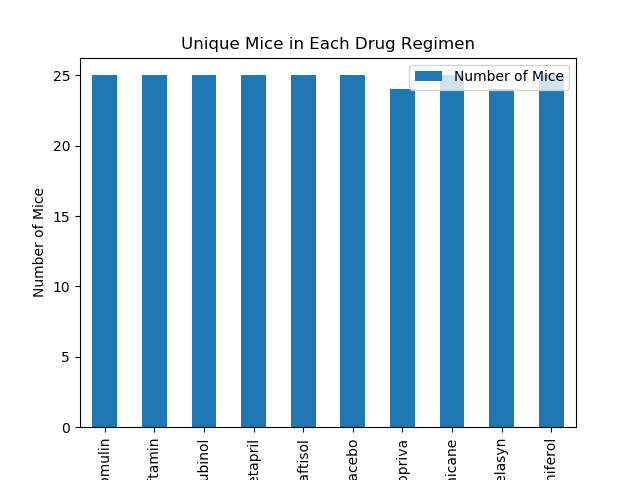

Text(0, 0.5, 'Number of Mice')

In [421]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugplot = regimen_df.plot(kind='bar', title='Unique Mice in Each Drug Regimen')
drugplot.set_xlabel("Drug Regimen")
drugplot.set_ylabel("Number of Mice")

<IPython.core.display.Javascript object>


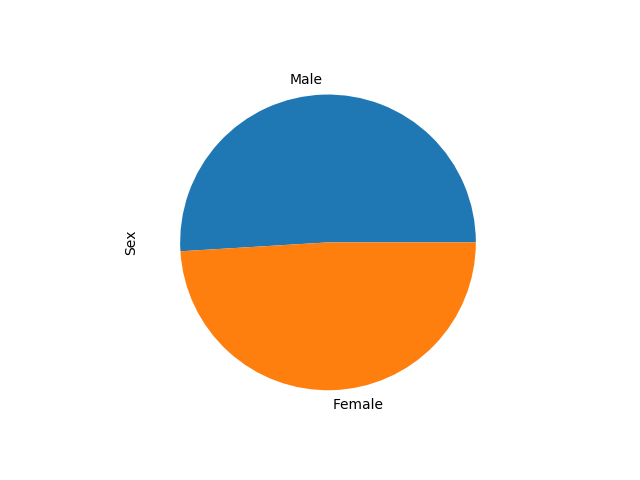

In [456]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
cleandatacombined['Sex'].value_counts().plot(kind='pie')

<IPython.core.display.Javascript object>


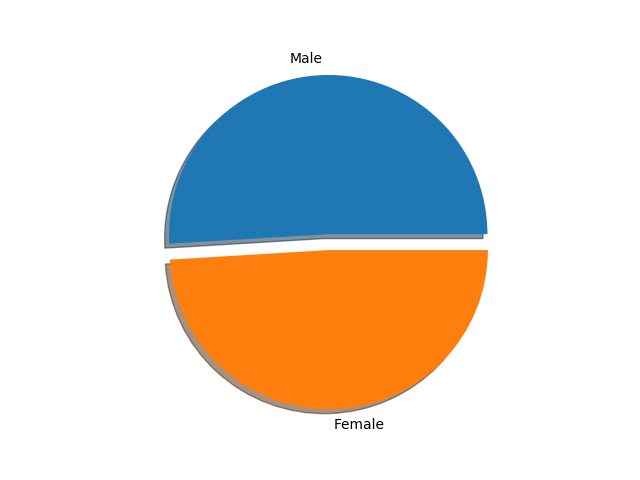

(-1.1097080975813773,
 1.100462290361018,
 -1.1129091579915955,
 1.2090725214168956)

In [463]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexdata = cleandatacombined['Sex'].value_counts()
explode = (0.1,0)
labels = ['Male', 'Female']

fig1, ax1 = plt.subplots()
ax1.pie(sexdata, explode=explode, labels=labels, shadow=True )
ax1.axis('equal')

## Quartiles, Outliers and Boxplots

In [319]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoints= cleandatacombined.loc[(cleandatacombined["Timepoint"] == 45)]
timepoints

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timetumor = pd.merge(cleandatacombined, timepoints, how='inner')
timetumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
5,s508,Ramicane,Male,1,17,45,30.276232,0
6,m546,Ramicane,Male,18,16,45,30.564625,1
7,z578,Ramicane,Male,11,16,45,30.638696,0
8,j913,Ramicane,Female,4,17,45,31.560470,1
9,u364,Capomulin,Male,18,17,45,31.023923,3


In [349]:
# Put treatments into a list for for loop (and later for plot labels)
countmice = timetumor['Mouse ID'].unique()
voltum = []

for i in countmice:
    voltum.append(len(i))

# Create empty list to fill with tumor vol data (for plotting)
    # done above

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumorvolume = timetumor['Tumor Volume (mm3)']
quartiles = tumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

print(f"IQR: {iqr}")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
drugtype = timetumor.groupby("Drug Regimen")
micetype = drugtype['Tumor Volume (mm3)'].mean() 
micetype
    # add subset 
    #above (I Think? The instructions for this subsection are not very clear.)
    micetype["Capomulin"]
    # Determine outliers using upper and lower bounds
print(f"Lower Bound: {lowerbound}")
print(f"Upper Bound: {upperbound}")
print("Outliers unlikely")
micetype

IQR: 28.211951665000008
Lower Bound: -1.6595831850000096
Upper Bound: 111.18822347500002
Outliers unlikely


Drug Regimen
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Ketapril     70.662958
Naftisol     69.265506
Placebo      68.084082
Propriva     66.258529
Ramicane     34.955595
Stelasyn     68.438310
Zoniferol    65.960888
Name: Tumor Volume (mm3), dtype: float64

<IPython.core.display.Javascript object>


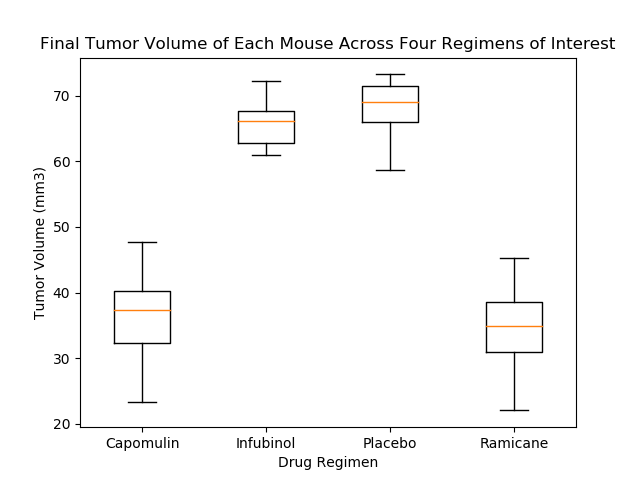

Text(0.5, 0, 'Drug Regimen')

In [380]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
micetumor = timetumor["Tumor Volume (mm3)"]
capomulin = micetumor.loc[(timetumor["Drug Regimen"] == 'Capomulin')]
infubinol = micetumor.loc[(timetumor["Drug Regimen"] == 'Infubinol')]
placebo = micetumor.loc[(timetumor["Drug Regimen"] == 'Placebo')]
ramicane = micetumor.loc[(timetumor["Drug Regimen"] == 'Ramicane')]

ax1.boxplot([capomulin, infubinol, placebo, ramicane])
plt.xticks([1,2,3,4],['Capomulin', 'Infubinol', 'Placebo', 'Ramicane'])
ax1.set_title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")

## Line and Scatter Plots

<IPython.core.display.Javascript object>


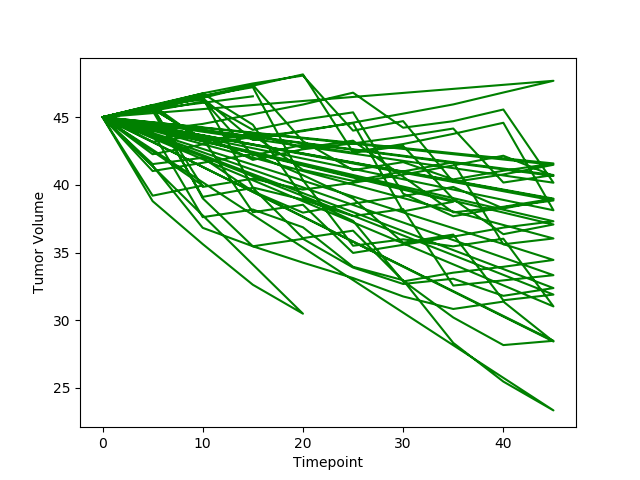

In [422]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumorgroup = cleandatacombined.groupby("Drug Regimen")
tumorvolume = tumorgroup['Tumor Volume (mm3)']
drugtype = cleandatacombined.loc[(cleandatacombined["Drug Regimen"] == 'Capomulin')]
captumvol = drugtype['Tumor Volume (mm3)']
captime = drugtype['Timepoint']

lineplot = plt.plot(captime, captumvol, color="green")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()

<IPython.core.display.Javascript object>


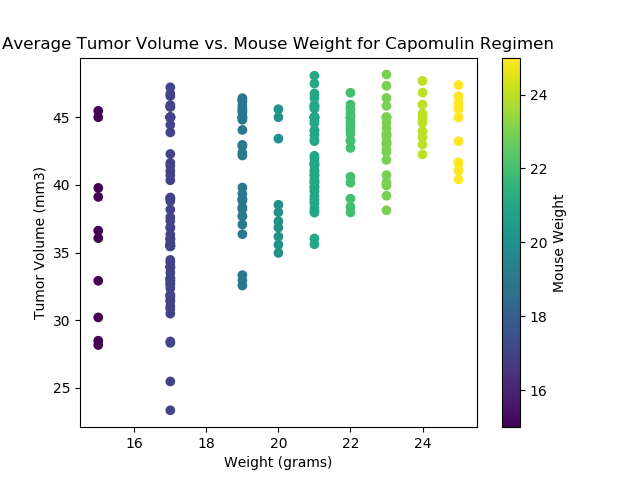

In [433]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drugtype = cleandatacombined.loc[(cleandatacombined["Drug Regimen"] == 'Capomulin')]
captumvol = drugtype['Tumor Volume (mm3)']
mouseweight = drugtype['Weight (g)']

plt.scatter(mouseweight, captumvol, c=mouseweight)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (grams)")
plt.ylabel("Tumor Volume (mm3)")
clb =plt.colorbar()
clb.set_label("Mouse Weight")

## Correlation and Regression

In [436]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(captumvol,mouseweight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


<IPython.core.display.Javascript object>


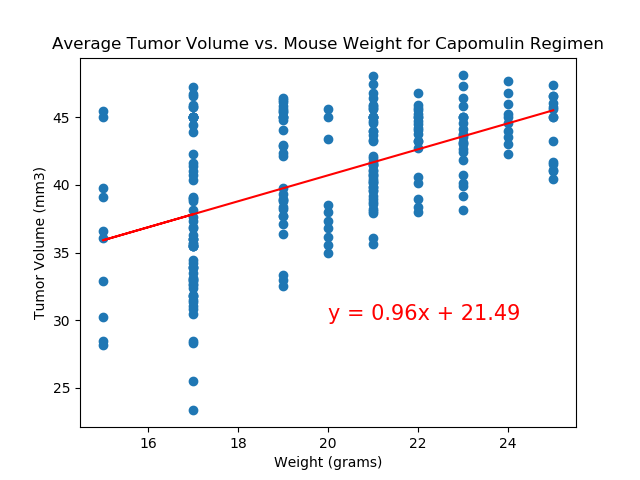

Text(0, 0.5, 'Tumor Volume (mm3)')

In [443]:
# Linear Regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouseweight, captumvol)
regress_values = mouseweight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouseweight, captumvol)
plt.plot(mouseweight,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.xlabel("Weight (grams)")
plt.ylabel("Tumor Volume (mm3)")